In [4]:
from enum import Enum
class FileType(Enum):
    Other = 0
    PEFileType = 1
    ZIPFileType = 2
    RARFileType = 3
    PDFFileType = 4
    OFFICEFileType = 5
    VBAFileType = 6
    EICARType = 7
    RTFFileType = 8
    TTFFileType = 9
    TIFFFileType = 10
    ScriptFileType = 11
    HWPFileType = 12
    PE64FileType = 13
    PE32FileType = 14
    SWFFileType = 15
    _7ZFileType = 16
    InstallerType = 17
    PowerShellScriptType = 18
    PowerShellInteractiveType = 19
    ActiveScriptType = 20
    HTMLApplicationType = 21
    JarFileType = 22
    OOXMLFileType = 23
    OfficePatternFileType = 24
    NotDefinedFileType = 25
    DDEFileType = 26
    Macho32FileType = 27
    Macho64FileType = 28
    MachoFATFileType = 29
    XarFileType = 30
    TarFileType = 31
    DMGFileType = 32
    OTFFileType = 33
    GzipFileType = 34
    ELFFileType = 35
    SOFileType = 36
    OFileType = 37
    KOFileType = 38
    SLKFileType = 39
    MSOXMLFileType = 40
    MHTFileType = 41
    LNKFileType = 42
    JavaScriptFileType = 43
    ELF32FileType = 44
    ELF64FileType = 45
    MachoARMFileType = 46
    EMLFileType = 47
    MSGFileType = 48
    Bzip2FileType = 49
    ISOFileType = 50
    HTMLFileType = 51
    MSIFileType = 52
    UnsupportedELFFileType = 53
    APKFileType = 54
    ARFileType = 55
    XZFileType = 56
    CSVFileType = 57

file_type_mapping = {
    FileType.Other.value: "OTHER",
    FileType.Macho32FileType.value: "MACHO",
    FileType.Macho64FileType.value: "MACHO",
    FileType.MachoFATFileType.value: "MACHO",
    FileType.XarFileType.value: "XAR",
    FileType.TarFileType.value: "TAR",
    FileType.PDFFileType.value: "PDF",
    FileType.DMGFileType.value: "DMG",
    FileType.RTFFileType.value: "RTF",
    FileType.TTFFileType.value: "TTF",
    FileType.OTFFileType.value: "OTF",
    FileType.OFFICEFileType.value: "OFFICE",
    FileType.ZIPFileType.value: "ZIP",
    FileType._7ZFileType.value: "SEVEN_Z", # pylint: disable=W0212 #generated name, cannot change it.
    FileType.EICARType.value: "EICAR",
    FileType.RARFileType.value: "RAR",
    FileType.PE32FileType.value: "PE",
    FileType.PE64FileType.value: "PE",
    FileType.PEFileType.value: "PE",
    FileType.SWFFileType.value: "SWF",
    FileType.TIFFFileType.value: "TIFF",
    FileType.JarFileType.value: "JAR",
    FileType.OOXMLFileType.value: "OFFICE",
    FileType.GzipFileType.value: "GZIP",
    FileType.Bzip2FileType.value: "BZIP2",
    FileType.ISOFileType.value: "ISO",
    FileType.HTMLFileType.value: "HTML",
    FileType.MHTFileType.value: "OFFICE",
    FileType.MSOXMLFileType.value: "OFFICE",
    FileType.VBAFileType.value: "OFFICE",
    FileType.MSGFileType.value: "MSG",
    FileType.EMLFileType.value: "EML",
    FileType.ELF32FileType.value: "ELF",
    FileType.ELF64FileType.value: "ELF",
    FileType.UnsupportedELFFileType.value: "ELF",
    FileType.LNKFileType.value: "LNK",
    FileType.JavaScriptFileType.value: "JAVASCRIPT",
    FileType.APKFileType.value: "APK",
    FileType.MSIFileType.value: "MSI",
    FileType.XZFileType.value: "XZ",
    FileType.ARFileType.value: "AR",
    FileType.CSVFileType.value: "CSV"
}

def map_file_type_to_appliance_string(file_type_int : int):
    if file_type_int not in list(file_type_mapping.keys()):
        return str(file_type_int)
    return file_type_mapping[file_type_int]

In [15]:
def display_table(df):
    # Style the DataFrame for better display
    styled_df = df.style.set_properties(**{
        'text-align': 'left',
        'border': '1px solid #ddd',
        'padding': '8px',
        'color': 'black',
        'white-space': 'nowrap'  # Prevent wrapping for headers
    }).set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#4CAF50'),
                                    ('color', 'white'),
                                    ('font-weight', 'bold'),
                                    ('text-align', 'center'),
                                    ('padding', '8px'),
                                    ('white-space', 'nowrap')]},  # Adjust headers
        {'selector': 'tr:nth-of-type(odd)', 'props': [('background-color', '#e9f5e9')]},
        {'selector': 'tr:nth-of-type(even)', 'props': [('background-color', '#f2f2f2')]},
        {'selector': 'td', 'props': [('white-space', 'normal'),
                                     ('padding', '8px')]},
        {'selector': 'caption', 'props': [('caption-side', 'top'),
                                         ('font-size', '1.2em'),
                                         ('font-weight', 'bold'),
                                         ('margin-bottom', '10px')]},
        {'selector': '.col_heading', 'props': [('text-align', 'center')]}
    ]).set_caption('Classification Time Comparison')

    # Display the styled DataFrame
    from IPython.display import display
    display(styled_df)

    return df
    
def export_to_csv(df, file_name):
    """
    Exports the provided DataFrame to a CSV file.

    Args:
        df (pd.DataFrame): The DataFrame to export.
        file_name (str): The output CSV file name.
    """
    try:
        df.to_csv(file_name, index=False)
        print(f"Data successfully exported to {file_name}")
    except Exception as e:
        print(f"An error occurred while exporting to CSV: {e}")
        

In [39]:
# JSON Classification Data Parser
# This script parses JSON data between >>>>> separators from two input files and displays a properly formatted table

import json
import pandas as pd
import re
from IPython.display import display, HTML

# Function to read and parse the file
def parse_file(file_path):
    data_list = []
    
    try:
        with open(file_path, 'r') as file:
            content = file.read()
            
            # Find all content between >>>>> markers
            pattern = r'>>>>>\s*(.*?)\s*(?=>>>>>|$)'
            matches = re.findall(pattern, content, re.DOTALL)
            
            for entry in matches:
                try:
                    # Parse the JSON entry
                    data = json.loads(entry.strip())

                    # Extract the required fields
                    '''
                    extracted_data = {
                        'containerHash': data.get('containerHash'),
                        'fileType': data.get('fileType'),
                        # 'classificationTime': data.get('classificationTime'),
                        'archiveInnerFilesStats': data.get('archiveInnerFilesStats', {}),
                        'size': data.get('size'),  # Extract size field
                        'magikaTimeSpent': data.get('magikaTimeSpent', 0),  # Extract size field
                        'realScanTime': data.get('realScanTime'),  # Extract size field
                        'magikaCallCounter': data.get('magikaCallCounter', None),
                        'event_description': data.get('event_description', ""),
                        "containsVBA" : data.get('containsVBA', 0),
                        "magikaTotalBytes" : data.get('magikaTotalBytes', 0),
                        'MagikaScansByType': data.get('populateMagikaScansByType', {}),
                        'magikaTotalScanDuration': data.get('magikaTotalScanDuration', 0),
                        'magikaScanDurations': data.get('magikaScanDurations', {}),
                    }
                    '''

                    fileHash = data.get('file_info').get('container_hash', None) 
                    if fileHash == None:
                        fileHash = data.get('file_info').get('file_hash')
                        
                    extracted_data = {
                        'hash': fileHash,
                        'fileType': data.get('file_info').get('file_type'),
                        'archiveInnerFilesStats': data.get('archiveInnerFilesStats', {}),
                        'size': data.get('file_info', {}).get('file_size_in_bytes', 0),
                        'magikaTimeSpent': data.get('magikaTimeSpent', 0),
                        'realScanTime': data.get('scan_duration_in_microseconds', 0),
                        'magikaCallCounter': data.get('magikaCallCounter', 0),
                        'event_description': data.get('verdict_details', {}).get('event_description', ""),
                        "magikaTotalBytes": data.get('magikaTotalBytes', 0),
                        'MagikaScansByType': data.get('magikaScansByType', {}),
                        'magikaTotalScanDuration': data.get('magikaTotalScanDuration', 0),
                        'magikaScanDurations': data.get('magikaScanDurations', {}),
                    }
                    
                    data_list.append(extracted_data)
                    
                except json.JSONDecodeError as e:
                    pass
                    # print(f"Error parsing JSON entry: {e}")
                    # print(f"Problematic entry: {entry[:100]}...")  # Print first 100 chars
    
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error reading file: {e}")
    
    return data_list

# Function to clean archive inner files stats (remove zero values)
def clean_inner_files_stats(archive_stats):
    return {map_file_type_to_appliance_string(int(k)): v for k, v in archive_stats.items() if int(v) > 0}

def clean_magika_by_type(archive_stats, archive_type, archive_size):
    filetypes = clean_inner_files_stats(archive_stats)
    if filetypes.get(archive_type) == archive_size:
        filetypes.pop(archive_type, None)
    return filetypes

def clean_magika_by_total_bytes(total_bytes, archive_stats, file_type, file_size):
    filetypes = clean_inner_files_stats(archive_stats)
    if filetypes.get(file_type) == file_size:
        return total_bytes - file_size
    return total_bytes

def is_key_greater_than_others(key, input_dict):
    """
    Checks if the value of the given key in the dictionary is greater
    than the sum of all other values in the dictionary.

    Args:
        key: The key to check.
        input_dict: The dictionary to evaluate.

    Returns:
        bool: True if the value of the key is greater than the sum of
              all other values, False otherwise.
    """
    key_value = input_dict.get(key, 0)
    other_values_sum = sum(value for k, value in input_dict.items() if k != key)
    
    return key_value > other_values_sum

    
# Function to create and display a nicely formatted table
def make_table(data_list_1, data_list_2):
    if not data_list_1 or not data_list_2:
        print("No data to display")
        return None

    # Initialize the data dictionary
    data_dict = {
        "containerHash": [], 
        "fileType": [], 
        "size": [],  # Add size column
        "classificationTime_1": [], 
        "classificationTime_2": [],
        "classificationTime_Diff": [],
       "magikaTotalScanDuration": [],
        "magikaTimeScanPercentage": [],
        "magikaCallCounter": [],
        "archiveInnerFilesStats_1": [],
        "archiveInnerFilesStats_2": [],
        "OtherNum" : [],
        "NonOtherNum" : [],
        "event_description_1": [],
        "event_description_2": [],
        "containsVBA": [],
        "magikaTotalBytes" : [],
        "MagikaScansByType": [],
        "OtherPercentage": [],
         "magikaTimeSpent": [],
        "magikaScanDurations": [],
        "otherDurationPercentage": [],
        "scanTimeOtherDominant": []
        
    }
    
    for scan1 in data_list_1:
        # Get hash, trim to 10 characters
        file_hash = scan1.get("hash")[:10]
        
        # Find corresponding scan in data_list_2 by matching hash
        scan2 = next((s for s in data_list_2 if s.get("hash")[:10] == file_hash), None)
        
        # Extract necessary fields from both scan1 and scan2

        file_type = map_file_type_to_appliance_string(scan1.get("fileType"))
        size = scan1.get("size")  # Get the size from scan1
        classificationTime_1 = scan1.get("realScanTime")
        classificationTime_2 = scan2.get("realScanTime")
        classificationTime_Diff = classificationTime_2 - classificationTime_1
        archiveInnerFilesStats_1 = clean_inner_files_stats(scan1.get("archiveInnerFilesStats"))
        archiveInnerFilesStats_2 = clean_inner_files_stats(scan2.get("archiveInnerFilesStats"))
        magikaTimeSpent = scan2.get("magikaTimeSpent", 0)
        magikaTimeScanPercentage = magikaTimeSpent * 100 / classificationTime_2
        magikaCallCounter = scan2.get("magikaCallCounter", 0)
        event_description_1 = scan1.get("event_description", "")
        event_description_2 = scan1.get("event_description", "")
        containsVBA = scan1.get("containsVBA", 0)

        # magikaTotalBytes = clean_magika_by_total_bytes(scan2.get("magikaTotalBytes"), scan2.get("MagikaScansByType"), file_type, size)
        magikaTotalBytes = scan2.get("magikaTotalBytes")
        # MagikaScansByType = clean_magika_by_type(scan2.get("MagikaScansByType"), file_type, size)
        MagikaScansByType = clean_inner_files_stats(scan2.get("MagikaScansByType"))

        magikaTotalScanDuration = scan2.get("magikaTotalScanDuration")
        magikaScanDurations = clean_inner_files_stats(scan2.get("magikaScanDurations"))
        
        scanTimeOtherDominant = is_key_greater_than_others('OTHER', magikaScanDurations)

        OtherNum = archiveInnerFilesStats_2.get("OTHER", 0)
        NonOtherNum = sum(archiveInnerFilesStats_2.values()) - OtherNum
        
        try:
            OtherPercentage = MagikaScansByType.get('OTHER', 0) * 100 / magikaTotalBytes
            otherDurationPercentage = magikaScanDurations.get('OTHER', 0) * 100 / magikaTotalScanDuration
        except ZeroDivisionError:
            OtherPercentage = 0
            otherDurationPercentage = 0
    
    
        # Append data for this row to the data_dict
        data_dict["containerHash"].append(file_hash)
        data_dict["fileType"].append(file_type)
        data_dict["size"].append(size)  # Add size to the data_dict
        data_dict["classificationTime_1"].append(classificationTime_1)
        data_dict["classificationTime_2"].append(classificationTime_2)
        data_dict["classificationTime_Diff"].append(classificationTime_Diff)
        data_dict["magikaTimeSpent"].append(magikaTimeSpent)
        data_dict["magikaTimeScanPercentage"].append(magikaTimeScanPercentage)
        data_dict["magikaCallCounter"].append(magikaCallCounter)
        data_dict["archiveInnerFilesStats_1"].append(archiveInnerFilesStats_1)
        data_dict["archiveInnerFilesStats_2"].append(archiveInnerFilesStats_2)
        data_dict["OtherNum"].append(OtherNum)
        data_dict["NonOtherNum"].append(NonOtherNum)
        data_dict["event_description_1"].append(event_description_1)
        data_dict["event_description_2"].append(event_description_2)
        data_dict["containsVBA"].append(containsVBA)
        data_dict["magikaTotalBytes"].append(magikaTotalBytes)
        data_dict["MagikaScansByType"].append(MagikaScansByType)
        data_dict["OtherPercentage"].append(OtherPercentage)
        data_dict["magikaTotalScanDuration"].append(magikaTotalScanDuration)
        data_dict["magikaScanDurations"].append(magikaScanDurations)
        data_dict["otherDurationPercentage"].append(otherDurationPercentage)
        data_dict["scanTimeOtherDominant"].append(scanTimeOtherDominant)
        
    
    # Convert to DataFrame
    df = pd.DataFrame(data_dict)

     # Set the index to start from 1
    df.index = range(1, len(df) + 1)
    df.index.name = "Index"

    return df


# Input file paths
file_path_1 = 'dpa_4.0.0.out2'
# file_path_1 = 'dpa_office_time_fix.out'
file_path_2 = 'dpa_develop_magika.out2'
# file_path_2 = 'dpa_develop_magika_compare.out2'

# Parse data from both files
data_list_1 = parse_file(file_path_1)
data_list_2 = parse_file(file_path_2)

if data_list_1:
    print(f"Successfully parsed {len(data_list_1)} entries from {file_path_1}.")
    
    # Display table with parsed data
    df = make_table(data_list_1, data_list_2)

    
    # print(len(df))
    # df = df[df["classificationTime_2"] - df["classificationTime_1"] < 0]
    # df = df[df["containsVBA"] == 1]
    # print(len(df))
    
    # df = df.sort_values(by="magikaTimeScanPercentage", ascending=False)
    # df = df.sort_values(by="OtherPercentage", ascending=False)
    # df = df.sort_values(by="magikaCallCounter", ascending=True)
    #df = df.sort_values(by="classificationTime_1", ascending=True)
    # df = df.sort_values(by="classificationTime_Diff", ascending=False)
    df = df.sort_values(by="containerHash", ascending=True)

    export_to_csv(df, "magika_performance.csv")

    
    display_table(df)
else:
    print("No valid data found in the first file.")

Successfully parsed 315 entries from dpa_4.0.0.out2.
Data successfully exported to magika_performance.csv


,containerHash,fileType,size,classificationTime_1,classificationTime_2,classificationTime_Diff,magikaTotalScanDuration,magikaTimeScanPercentage,magikaCallCounter,archiveInnerFilesStats_1,archiveInnerFilesStats_2,OtherNum,NonOtherNum,event_description_1,event_description_2,containsVBA,magikaTotalBytes,MagikaScansByType,OtherPercentage,magikaTimeSpent,magikaScanDurations,otherDurationPercentage,scanTimeOtherDominant
Index,,,,,,,,,,,,,,,,,,,,,,,
246,010a52f4a7,MSGFileType,5019648,118695,130714,12019,35949,27.502027,3,{'OTHER': 2},{'OTHER': 2},2,0,File identified as benign,File identified as benign,0,9958582,"{'OTHER': 4938934, 'MSG': 5019648}",49.594752,35949,"{'OTHER': 10973, 'EML': 14029, 'HTML': 10947}",30.523798,False
51,010a52f4a7,MSGFileType,5019648,92698,130714,38016,35949,27.502027,3,{'OTHER': 2},{'OTHER': 2},2,0,File identified as benign,File identified as benign,0,9958582,"{'OTHER': 4938934, 'MSG': 5019648}",49.594752,35949,"{'OTHER': 10973, 'EML': 14029, 'HTML': 10947}",30.523798,False
129,010d5395c0,Unknown,456200,16599,41998,25399,19050,45.359303,1,{},{},0,0,File identified as benign,File identified as benign,0,456200,{'OTHER': 456200},100.000000,19050,{'OTHER': 19050},100.000000,True
145,0189e762e6,GzipFileType,6883079,230799,263232,32433,3831148,1455.426392,215,"{'OTHER': 203, 'TAR': 2, 'GZIP': 1, 'PDF': 1, 'JAVASCRIPT': 2, 'EML': 5}","{'OTHER': 203, 'TAR': 2, 'GZIP': 1, 'PDF': 1, 'JAVASCRIPT': 2, 'EML': 5}",203,11,File identified as malicious,File identified as malicious,0,27922460,"{'OTHER': 1307755, 'TAR': 19200000, 'GZIP': 6892351, 'PDF': 74012, 'JAVASCRIPT': 21500, 'EML': 426842}",4.683524,3831148,"{'OTHER': 3732749, 'TAR': 37848, 'GZIP': 44506, 'PDF': 16045}",97.431605,True
258,0316c4d6c4,MSGFileType,474112,19978,38509,18531,26241,68.142512,3,"{'OTHER': 1, 'ZIP': 1}","{'OTHER': 1, 'ZIP': 1}",1,1,File identified as benign,File identified as benign,0,910866,"{'OTHER': 99, 'ZIP': 436655, 'MSG': 474112}",0.010869,26241,"{'OTHER': 7855, 'ZIP': 7725, 'EML': 10661}",29.934073,False
110,034567b36f,RTFFileType,4659243,184303,183746,-557,15576,8.476919,1,{},{},0,0,RTF file identified as malicious,RTF file identified as malicious,0,4659243,{'RTF': 4659243},0.000000,15576,{'RTF': 15576},0.000000,False
58,0479e7b5a3,OOXMLFileType,1986248,60392,221444,161052,145798,65.839671,15,{'OTHER': 14},{},0,0,File identified as benign,File identified as benign,0,4016270,"{'OTHER': 2030022, 'OFFICE': 1986248}",50.544958,145798,"{'OTHER': 133957, 'OFFICE': 11841}",91.878489,True
45,05901bda47,OOXMLFileType,457728,22146,26216,4070,58619,223.600092,7,"{'OTHER': 5, 'OFFICE': 1}",{},0,0,Office file identified as malicious,Office file identified as malicious,0,902176,"{'OTHER': 25505, 'OFFICE': 457728}",2.827054,58619,"{'OTHER': 39293, 'OFFICE': 19326}",67.031167,True
154,05f0ef6343,ELF64FileType,12387144,467305,516665,49360,15700,3.038719,1,{},{},0,0,File identified as benign,File identified as benign,0,12387144,{'ELF': 12387144},0.000000,15700,{'ELF': 15700},0.000000,False


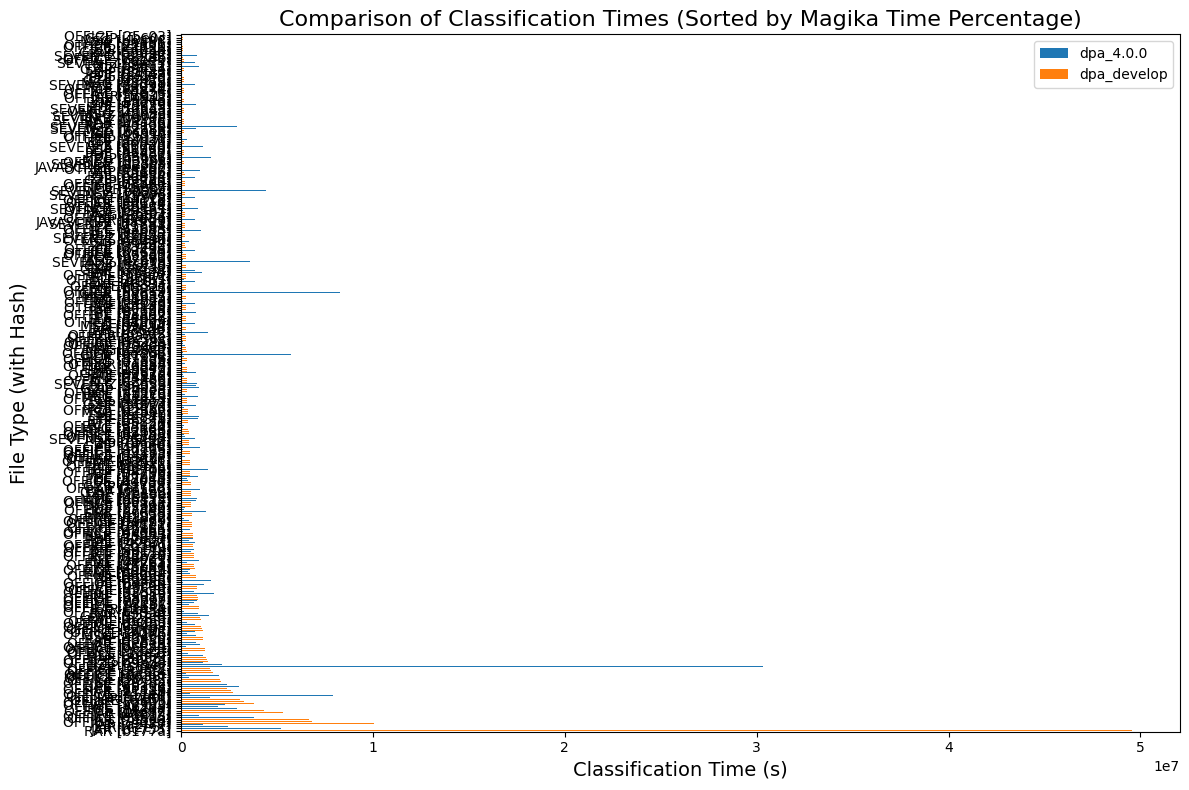

In [118]:
import matplotlib.pyplot as plt

def plot_classification_time_comparison(df):
    """
    Plots a comparison of classification times for different file types with hash annotations, sorted by magikaTimeScanPercentage.

    Args:
        df (pd.DataFrame): The input DataFrame containing file type, classification times, container hash, and magikaTimeScanPercentage.
    """
    # Filter out classification times lower than the threshold
    scan_time_threshold = 2
    df = df[(df['classificationTime_1'] >= scan_time_threshold) | (df['classificationTime_2'] >= scan_time_threshold)]

    # Sort the DataFrame by magikaTimeScanPercentage in descending order
    df = df.sort_values(by='magikaTimeScanPercentage', ascending=False)
    df = df.sort_values(by='classificationTime_2', ascending=False)

    # Create a new DataFrame for the plot with rows as 'fileType' and columns for classification times
    df_plot = df[['fileType', 'classificationTime_1', 'classificationTime_2', 'containerHash']].copy()

    # Rename the columns to match the desired labels
    df_plot.rename(columns={'classificationTime_1': 'dpa_4.0.0', 'classificationTime_2': 'dpa_develop'}, inplace=True)

    # Add a new column for the fileType with the first 5 characters of the container hash
    df_plot['fileType_with_hash'] = df_plot['fileType'] + " [" + df_plot['containerHash'].str[:5] + "]"

    # Set the new combined 'fileType_with_hash' as the index
    df_plot.set_index('fileType_with_hash', inplace=True)

    # Plot a horizontal bar chart for classification times
    df_plot[['dpa_4.0.0', 'dpa_develop']].plot(kind='barh', figsize=(12, 8))

    # Set chart title and axis labels
    plt.title('Comparison of Classification Times (Sorted by Magika Time Percentage)', fontsize=16)
    plt.xlabel('Classification Time (s)', fontsize=14)
    plt.ylabel('File Type (with Hash)', fontsize=14)

    # Enhance layout for better readability
    plt.tight_layout()

    # Display the plot
    plt.show()


plot_classification_time_comparison(df)

In [63]:
import subprocess
import os

def search_files(base_dir, file_names):
    """Search for files in a given directory and its subdirectories."""
    found_files = {}
    for root, _, files in os.walk(base_dir):
        for file in files:
            for partial_name in file_names:
                if partial_name in file:  # Check if the partial name matches any part of the filename
                    found_files[file] = os.path.join(root, file)
    return found_files


def execute_binwalk(file_path, output_dir):
    """Execute binwalk on a file and save the output."""
    output_file = os.path.join(output_dir, os.path.basename(file_path) + ".binwalk")
    with open(output_file, "w") as outfile:
        subprocess.run(["binwalk", "-M", "-e", file_path], stdout=outfile, stderr=subprocess.STDOUT)

 # Search for files
file_names = [
    "7402d917b9", "e601329d26", "e1b4be0905", "8ea1466e55", "7929bef0b5", 
    "d046a2b743", "925ab4257e", "417edf1f4e", "63d80601af", "c0169b0f69", 
    "34a733cd13", "7c54e1a5db", "3e2c5d83a4", "fcee82e92a", "4bb8d39dca", 
    "bba2930690", "7676b75120", "723e720228", "1293a66f2f", "ac028e507f", 
    "f7e0f7105a", "dc755245a0", "0b3f755186", "a2f773f6c8", "7e5c005d62", 
    "010a52f4a7", "a28f5ed056", "e279f0c330", "c2e5f0c0f9", "2113b4d6e5", 
    "fbf347902d", "b177ac44fc", "462aa0251d"
]

file_names = ["74d915debd"]


found_files = search_files("/home/tomer/clones/sample_file", file_names)

if not found_files:
    print("No files found matching the given filenames.")

# Ensure the output directory exists
OUTPUT_DIR="./binwalk/high_diff"
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Execute binwalk for each found file
for file_name, file_path in found_files.items():
    print(f"Processing {file_name}...")
    execute_binwalk(file_path, OUTPUT_DIR)

print(f"Binwalk output saved to {OUTPUT_DIR}.")

Processing 74d915debddc6f9e899ee6bb1a37d24bba1f79c45388bd298ecfea4cd888110f...
Binwalk output saved to ./binwalk/high_diff.
